# 1. Introduction to Logistic Regression

When data scientists may come across a new classification problem, the first algorithm that may come across their mind is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

# 2. Logistic Regression intuition

In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

The Logistic Regression algorithm works as follows -

## Implement linear equation
Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended to

z = β0 + β1x1+ β2x2+……..+ βnxn

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

## Sigmoid Function
This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

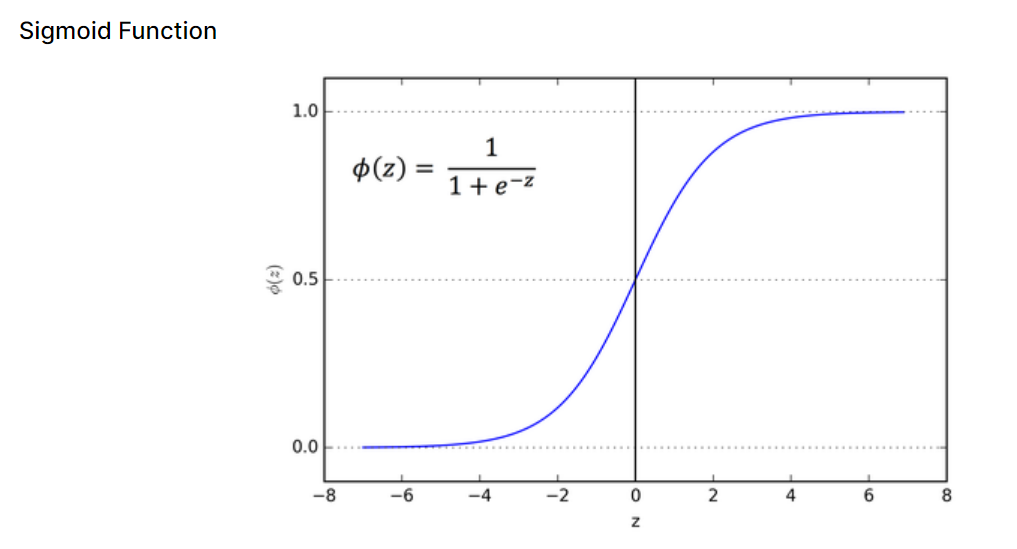

# Decision boundary
The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

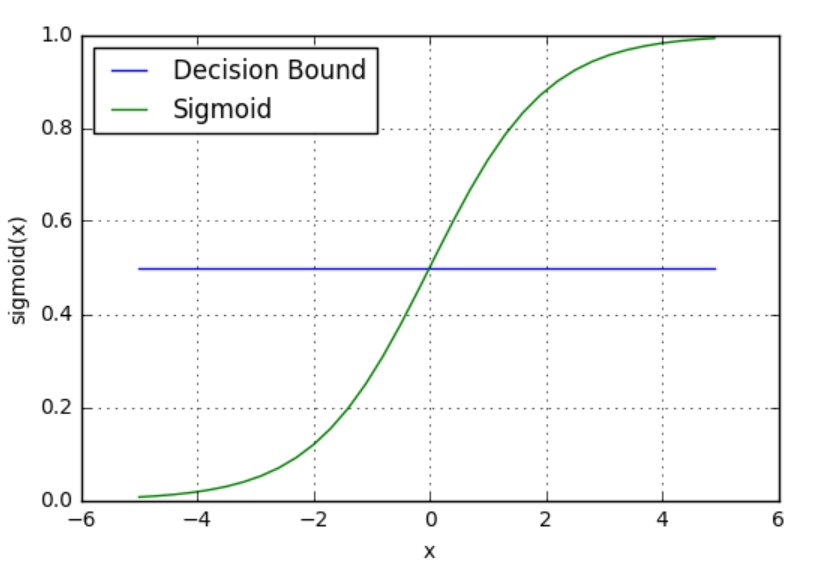

##Making predictions
Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.

# 3. Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

## 4. Types of Logistic Regression

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

# Problem Statement

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Reading the file
df = pd.read_csv("/content/drive/MyDrive/Data Science Files/weatherAUS.csv")

# Exploratory data analysis 

In [4]:
# view dimensions of dataset
# We can see that there are 142193 instances and 24 variables in the data set.
df.shape

(145460, 23)

In [5]:
#preview dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#smmary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#checking null values in dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#Dropping the null values in dependent variable
df1 = df[df['RainTomorrow'].notna()]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [11]:
#filling the null values in numerical variable
df1 = df.fillna(df.median())

In [12]:
df1.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
#replacing null values in categorical variables with mode value
df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0], inplace=True)
df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)
df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)
df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)

In [14]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [15]:
#checking info after replacing null vlues
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [16]:
#checking null values
df1.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

###Types of variables
In this section, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, we will find categorical variables.

In [19]:
# find categorical variables

categorical = [var for var in df1.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
# view the categorical variables

df1[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [33]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df1['Location']= label_encoder.fit_transform(df1['Location'])
df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])
df1['RainToday']= label_encoder.fit_transform(df1['RainToday'])
df1['RainTomorrow']= label_encoder.fit_transform(df1['RainTomorrow'])
df1['Date']= label_encoder.fit_transform(df1['Date'])
  
print(df1['Location'].unique())

print('\n\n',df1['WindGustDir'].unique())

print('\n\n',df1['WindDir9am'].unique())

print('\n\n',df1['WindDir3pm'].unique())

print('\n\n',df1['RainToday'].unique())

print('\n\n',df1['RainTomorrow'].unique())

print('\n\n',df1['Date'].unique())



[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]


 [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]


 [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]


 [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]


 [0 1]


 [0 1 2]


 [396 397 398 ...  89  90  91]


In [32]:
df1[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,396,2,13,13,14,0,0
1,397,2,14,6,15,0,0
2,398,2,15,13,15,0,0
3,399,2,4,9,0,0,0
4,400,2,13,1,7,0,0


## Summary of categorical variables
There is a date variable. It is denoted by Date column.

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

### Explore problems within categorical variables
First, we will explore the categorical variables.

Missing values in categorical variables

In [34]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [35]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [36]:
 # view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2114    49
2407    49
2398    49
2399    49
2400    49
        ..
28       1
27       1
26       1
25       1
91       1
Name: Date, Length: 3436, dtype: int64
9     3436
37    3344
13    3193
18    3193
7     3193
0     3193
31    3193
15    3193
1     3040
22    3040
5     3040
39    3040
14    3040
8     3040
17    3040
3     3040
6     3040
2     3040
23    3040
47    3040
24    3039
40    3039
30    3039
48    3009
28    3009
10    3009
11    3009
21    3009
35    3009
32    3009
29    3009
46    3009
4     3009
20    3009
27    3009
19    3009
34    3009
38    3009
42    3009
45    3009
12    3009
44    3009
33    3009
43    3006
26    3004
36    3001
16    1578
25    1578
41    1578
Name: Location, dtype: int64
16    10326
13     9915
9      9418
3      9313
10     9216
0      9181
8      9168
15     9069
12     8967
11     8736
14     8252
7      8122
1      8104
2      7372
4      7133
6      6620
5      6548
Name: WindGustDir, dtype: int64
3     11758
16    10566
9      9287


## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, we will check for high cardinality.

In [37]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

# Declare feature vector and target variable 

In [39]:
X = df1.drop(['RainTomorrow'], axis=1)

y = df1['RainTomorrow']

In [40]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 22), (29092, 22))

# Feature Eng.

In [42]:
# check data types in X_train

X_train.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
dtype: object

In [43]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [44]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [45]:
# Engineering missing values in numerical variables

# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [46]:
y_train.isna().sum()

0

# Engineering missing values in categorical variables¶



In [47]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Series([], dtype: float64)

In [48]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [49]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Series([], dtype: float64)

In [50]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Series([], dtype: float64)

In [51]:
# As a final check, we will check for missing values in X_train and X_test.

# check missing values in X_train

X_train.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [52]:
# check missing values in X_test

X_test.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [53]:
X_train.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
22926,2234,27,18.8,23.7,0.2,5.0,7.3,2,52.0,2,...,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0
80735,3173,44,9.3,24.0,0.2,1.6,10.9,4,48.0,6,...,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0
121764,1369,31,10.9,22.2,1.4,1.2,9.6,12,26.0,3,...,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1
139821,953,13,19.3,29.9,0.0,9.2,11.0,2,43.0,2,...,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0
1867,2263,2,15.7,17.6,12.4,4.8,8.4,0,20.0,2,...,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1


In [54]:
X_test.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
138175,2500,3,21.9,39.4,1.6,11.2,11.5,6,57.0,4,...,33.0,50.0,26.0,1008.5,1004.1,2.0,6.0,29.8,35.4,1
38638,2536,42,20.5,37.5,0.0,9.2,8.4,14,59.0,1,...,20.0,47.0,22.0,1012.9,1006.5,4.0,7.0,27.3,35.7,0
124058,654,36,5.1,17.2,0.2,4.8,8.4,13,50.0,14,...,22.0,68.0,51.0,1017.6,1015.2,5.0,5.0,10.1,16.1,0
99214,3137,0,11.9,16.8,1.0,4.8,8.4,12,28.0,14,...,13.0,80.0,79.0,1018.5,1017.7,5.0,5.0,14.3,15.2,0
25097,1366,30,7.5,21.3,0.0,4.8,8.4,4,15.0,12,...,7.0,88.0,52.0,1017.6,1015.2,5.0,5.0,13.7,21.1,0


## Feature Scaling 

In [55]:
X_train.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,1927.424017,23.811288,12.190189,23.203107,2.321101,5.174856,7.982476,8.096504,39.982091,7.003180,...,18.691384,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,0.219648
std,885.227909,14.225133,6.366893,7.085408,8.454648,3.184452,2.761639,4.691228,13.127953,4.511328,...,8.720419,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,0.414010
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,1166.000000,11.000000,7.700000,18.000000,0.000000,4.000000,8.200000,4.000000,31.000000,3.000000,...,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,1949.000000,24.000000,12.000000,22.600000,0.000000,4.800000,8.400000,9.000000,39.000000,7.000000,...,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,2692.000000,36.000000,16.800000,28.200000,0.600000,5.200000,8.600000,13.000000,46.000000,11.000000,...,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000
max,3435.000000,48.000000,31.900000,48.100000,367.600000,145.000000,14.500000,15.000000,135.000000,15.000000,...,83.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,1.000000


In [56]:
cols = X_train.columns


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [58]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [59]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [60]:
X_train.describe()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.561113,0.496069,0.512133,0.529359,0.006314,0.035689,0.550516,0.539767,0.263427,0.466879,...,0.225197,0.689507,0.516058,0.613882,0.610319,0.518232,0.588841,0.510115,0.519332,0.219648
std,0.257708,0.296357,0.157596,0.133940,0.023000,0.021962,0.190458,0.312749,0.101767,0.300755,...,0.105065,0.188114,0.204400,0.111210,0.106584,0.253410,0.263255,0.136068,0.131445,0.414010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339447,0.229167,0.400990,0.431002,0.000000,0.027586,0.565517,0.266667,0.193798,0.200000,...,0.156627,0.570000,0.370000,0.545455,0.544000,0.333333,0.500000,0.411392,0.424184,0.000000
50%,0.567394,0.500000,0.507426,0.517958,0.000000,0.033103,0.579310,0.600000,0.255814,0.466667,...,0.228916,0.700000,0.520000,0.613223,0.609600,0.555556,0.625000,0.504219,0.508637,0.000000
75%,0.783697,0.750000,0.626238,0.623819,0.001632,0.035862,0.593103,0.866667,0.310078,0.733333,...,0.289157,0.830000,0.650000,0.682645,0.676800,0.666667,0.750000,0.605485,0.606526,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model training 

In [61]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict results 

In [62]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

# predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no rain and 1 is for probability of rain.

In [63]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.82853638, 0.73337425, 0.831236  , ..., 0.57635762, 0.686995  ,
       0.9486096 ])

In [64]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.16493756, 0.19291954, 0.13487763, ..., 0.41220779, 0.27235237,
       0.02876936])

# Check accuracy score

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8242


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.



# Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [66]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8233


# Check for overfitting and underfitting

In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8233
Test set score: 0.8242


# Confusion matrix 
Table of Contents

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [95]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20896  1186     0]
 [ 3284  3082     0]
 [  571    73     0]]

True Positives(TP) =  20896

True Negatives(TN) =  3082

False Positives(FP) =  1186

False Negatives(FN) =  3284


The confusion matrix shows 20892 + 3285 = 24177 correct predictions and 3087 + 1175 = 4262 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 20892

True Negatives (Actual Negative:0 and Predict Negative:0) - 3285

False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error)

# Classification metrices

## Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     22082
           1       0.71      0.48      0.58      6366
           2       0.00      0.00      0.00       644

    accuracy                           0.82     29092
   macro avg       0.52      0.48      0.49     29092
weighted avg       0.80      0.82      0.80     29092



# Classification accuracy¶


In [72]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [73]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8429


# Classification error

In [74]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1571


# Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [76]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9463


# Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [77]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8642


# True Positive Rate
True Positive Rate is synonymous with Recall.

In [78]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8642


# False Positive Rate

In [79]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2779


# Specificity

In [80]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7221


# f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## Support
Support is the actual number of occurrences of the class in our dataset.

#Adjusting the threshold level 

In [85]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.82853638, 0.16493756, 0.00652606],
       [0.73337425, 0.19291954, 0.07370621],
       [0.831236  , 0.13487763, 0.03388638],
       [0.73884767, 0.233182  , 0.02797033],
       [0.93344644, 0.05512822, 0.01142534],
       [0.96105764, 0.02947328, 0.00946908],
       [0.5753477 , 0.38667952, 0.03797278],
       [0.51566996, 0.47446862, 0.00986142],
       [0.66682827, 0.28718093, 0.04599079],
       [0.85941312, 0.11722868, 0.0233582 ]])

### Observations
In each row, the numbers sum to 1.

* There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that there is no rain tomorrow.

Class 1 - predicted probability that there is rain tomorrow.

* Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.

* predict_proba process

Predicts the probabilities

Choose the class with the highest probability

* Classification threshold level: 

There is a classification threshold level of 0.5.

Class 1 - probability of rain is predicted if probability > 0.5.

Class 0 - probability of no rain is predicted if probability < 0.5.

In [94]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)','2'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1),2
0,0.828536,0.164938,0.006526
1,0.733374,0.192920,0.073706
2,0.831236,0.134878,0.033886
3,0.738848,0.233182,0.027970
4,0.933446,0.055128,0.011425
5,0.961058,0.029473,0.009469
6,0.575348,0.386680,0.037973
7,0.515670,0.474469,0.009861
8,0.666828,0.287181,0.045991
9,0.859413,0.117229,0.023358
